<a href="https://colab.research.google.com/github/Lakshman511/EVA4/blob/master/S11/Eva4_S11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from torchvision import datasets
train=datasets.CIFAR10("./data",train=True,download=True)

Files already downloaded and verified


In [0]:
from tqdm import tqdm_notebook
from PIL import Image

In [0]:
a=255
import numpy as np
n=0
s=np.zeros(3)
sq=np.zeros(3)

In [0]:
for data,l in tqdm_notebook(train):
  x=np.array(data)/a
  s+=x.sum(axis=(0,1))
  sq+=np.sum(np.square(x),axis=(0,1))
  n+=x.shape[0]*x.shape[1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [0]:
mu=s/n
std=np.sqrt((sq/n-np.square(mu)))

In [0]:
print(mu,std)

[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]


In [0]:
nms=[mu,std]

In [0]:
import sys
sys.path.append("/content/drive/My Drive/myLibrary")

In [0]:
import numpy as np
from eva4albumentations import Albumentations

In [0]:
a,b=40,3

In [0]:
b=32

In [0]:
c=(1,8,8,True)

In [0]:
p=(a,a,4,None,None,True)

In [0]:
rc=(b,b,True)

In [0]:
test_transforms=Albumentations(nms)
train_transforms=Albumentations(nms,Padding=p,RandomCrop=rc,HorizontalFlip=True,cutout=c)

In [0]:
train=datasets.CIFAR10("./data",train=True,download=True,transform=train_transforms)
test=datasets.CIFAR10("./data",train=False,download=True,transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [0]:
import eva4dataloaders

In [0]:
batch_size=512

In [0]:
dataloader=eva4dataloaders.DataLoader(batch_size=batch_size)
train_loader=dataloader.load(train)
test_loader=dataloader.load(test)

In [0]:
from __future__ import print_function
def unnormalize(img):
  img=img.numpy().astype(dtype=np.float32)
  for i in range(img.shape[0]):
    img[i]=(img[i]*std[i])+mu[i]
  return np.transpose(img,(1,2,0))  

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
dataiter=iter(train_loader)
images,labels=dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([512, 3, 32, 32])
torch.Size([512])


In [0]:
num_classes=10
r,c=10,11
n=5
b=14


In [0]:
e=0.01
x=-1.5
y=0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


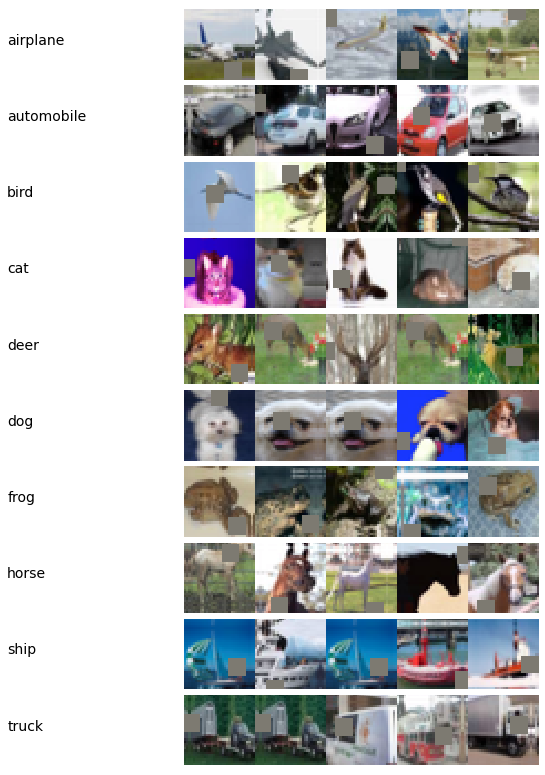

In [0]:
fig=plt.figure(figsize=(b,b))
fig.subplots_adjust(hspace=e,wspace=e)
for i in range(num_classes):
  idx=np.random.choice(np.where(labels[:]==i)[0],n)
  ax=plt.subplot(r,c,i*c+1)
  ax.text(x,y,class_names[i],fontsize=b)
  plt.axis('off')
  for j in range(1,n+1):
    plt.subplot(r,c,i*c+j+1)
    plt.imshow(unnormalize(images[idx[j-1]]),interpolation='none')
    plt.axis('off')
plt.show()    

Files already downloaded and verified



Files already downloaded and verified
Files already downloaded and verified



Validation loss decreased (100000.000000 --> 1.844892).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0042, Accuracy: 24.01%; Test set: Average loss: 1.8449, Accuracy: 34.60%
Learning Rate = 0.000100



Validation loss decreased (1.844892 --> 1.598503).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0034, Accuracy: 36.73%; Test set: Average loss: 1.5985, Accuracy: 43.00%
Learning Rate = 0.000143



Validation loss decreased (1.598503 --> 1.431631).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0031, Accuracy: 43.84%; Test set: Average loss: 1.4316, Accuracy: 48.81%
Learning Rate = 0.000204



Validation loss decreased (1.431631 --> 1.314238).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0028, Accuracy: 49.11%; Test set: Average loss: 1.3142, Accuracy: 53.08%
Learning Rate = 0.000292



Validation loss decreased (1.314238 --> 1.196749).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0026, Accuracy: 53.25%; Test set: Average loss: 1.1967, Accuracy: 57.71%
Learning Rate = 0.000416



Validation loss decreased (1.196749 --> 1.087748).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0023, Accuracy: 57.39%; Test set: Average loss: 1.0877, Accuracy: 61.67%
Learning Rate = 0.000595



Validation loss decreased (1.087748 --> 1.018633).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0021, Accuracy: 61.20%; Test set: Average loss: 1.0186, Accuracy: 63.79%
Learning Rate = 0.000850



Validation loss decreased (1.018633 --> 0.935459).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0020, Accuracy: 64.85%; Test set: Average loss: 0.9355, Accuracy: 67.14%
Learning Rate = 0.001214



Validation loss decreased (0.935459 --> 0.897579).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0018, Accuracy: 67.78%; Test set: Average loss: 0.8976, Accuracy: 68.36%
Learning Rate = 0.001735



Validation loss decreased (0.897579 --> 0.771358).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0016, Accuracy: 71.12%; Test set: Average loss: 0.7714, Accuracy: 73.08%
Learning Rate = 0.002478



Epoch: 11, Train set: Average loss: 0.0015, Accuracy: 73.67%; Test set: Average loss: 0.7755, Accuracy: 73.28%
Learning Rate = 0.003540



Epoch: 12, Train set: Average loss: 0.0014, Accuracy: 75.30%; Test set: Average loss: 0.8863, Accuracy: 69.46%
Learning Rate = 0.005057



Validation loss decreased (0.771358 --> 0.656073).  Saving model ...
Epoch: 13, Train set: Average loss: 0.0014, Accuracy: 76.05%; Test set: Average loss: 0.6561, Accuracy: 78.31%
Learning Rate = 0.007225



Epoch: 14, Train set: Average loss: 0.0015, Accuracy: 75.61%; Test set: Average loss: 0.7915, Accuracy: 74.78%
Learning Rate = 0.010321



Validation loss decreased (0.656073 --> 0.635158).  Saving model ...
Epoch: 15, Train set: Average loss: 0.0019, Accuracy: 73.69%; Test set: Average loss: 0.6352, Accuracy: 79.62%
Learning Rate = 0.014744



Validation loss decreased (0.635158 --> 0.624881).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0019, Accuracy: 74.74%; Test set: Average loss: 0.6249, Accuracy: 80.25%
Learning Rate = 0.021063



Epoch: 17, Train set: Average loss: 0.0024, Accuracy: 72.33%; Test set: Average loss: 0.7169, Accuracy: 77.93%
Learning Rate = 0.030091



Epoch: 18, Train set: Average loss: 0.0025, Accuracy: 72.69%; Test set: Average loss: 0.6310, Accuracy: 81.67%
Learning Rate = 0.042987



Validation loss decreased (0.624881 --> 0.505174).  Saving model ...
Epoch: 19, Train set: Average loss: 0.0014, Accuracy: 79.19%; Test set: Average loss: 0.5052, Accuracy: 83.80%
Learning Rate = 0.061409



Epoch: 20, Train set: Average loss: 0.0081, Accuracy: 18.79%; Test set: Average loss: 2.1930, Accuracy: 19.71%
Learning Rate = 0.087728



Epoch: 21, Train set: Average loss: 0.0041, Accuracy: 24.97%; Test set: Average loss: 1.9000, Accuracy: 28.11%
Learning Rate = 0.125325



Epoch: 22, Train set: Average loss: 0.0033, Accuracy: 36.69%; Test set: Average loss: 1.5203, Accuracy: 42.90%
Learning Rate = 0.179036



Epoch: 23, Train set: Average loss: 0.0028, Accuracy: 46.62%; Test set: Average loss: 1.4518, Accuracy: 48.66%
Learning Rate = 0.255766



Epoch: 24, Train set: Average loss: 0.0024, Accuracy: 54.64%; Test set: Average loss: 1.1264, Accuracy: 60.02%
Learning Rate = 0.365380



Epoch: 25, Train set: Average loss: 0.0022, Accuracy: 60.73%; Test set: Average loss: 0.9876, Accuracy: 65.12%
Learning Rate = 0.521972



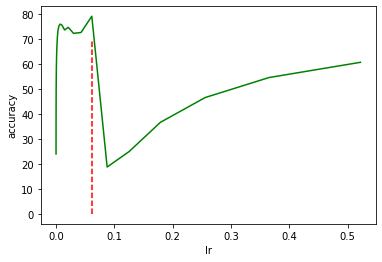

In [0]:
from eva4lr_range_test import lr_range_test
max_lr=lr_range_test()

In [0]:
max_lr=int(max_lr*100)/100
min_lr=max_lr/10#max_la

In [0]:
print(min_lr,max_lr)

0.006 0.06


In [0]:
import eva4models11

In [0]:
model=eva4models11.ResNetforS11().to("cuda")

In [0]:
from eva4statsmanager import StatsManager

In [0]:
statsmanager=StatsManager()

In [0]:
model.summary((3,32,32 ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

In [0]:
L2lambda=0
EPOCHS=24
a=10
b=0.2

In [0]:
optimizer=optim.SGD(model.parameters(),lr=min_lr,momentum=0.9,nesterov=True,weight_decay=L2lambda)#)

In [0]:
scheduler=OneCycleLR(optimizer,max_lr=max_lr,steps_per_epoch=len(train_loader),pct_start=b,epochs=EPOCHS,div_factor=a,final_div_factor=a)

In [0]:
model.gotrain(optimizer,train_loader,test_loader,EPOCHS,"/content/drive/My Drive",statsmanager,scheduler,True,0)


Validation loss decreased (100000.000000 --> 1.515500).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0044, Accuracy: 33.26%; Test set: Average loss: 1.5155, Accuracy: 47.00%
Learning Rate = 0.011602



Validation loss decreased (1.515500 --> 1.514396).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0028, Accuracy: 52.12%; Test set: Average loss: 1.5144, Accuracy: 53.05%
Learning Rate = 0.026085



Epoch: 3, Train set: Average loss: 0.0030, Accuracy: 58.10%; Test set: Average loss: 2.0050, Accuracy: 47.38%
Learning Rate = 0.043437



Epoch: 4, Train set: Average loss: 0.0028, Accuracy: 62.48%; Test set: Average loss: 1.5597, Accuracy: 60.83%
Learning Rate = 0.056458



Validation loss decreased (1.514396 --> 0.957449).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0020, Accuracy: 70.49%; Test set: Average loss: 0.9574, Accuracy: 73.16%
Learning Rate = 0.059982



Validation loss decreased (0.957449 --> 0.739020).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0017, Accuracy: 74.84%; Test set: Average loss: 0.7390, Accuracy: 76.20%
Learning Rate = 0.059420



Validation loss decreased (0.739020 --> 0.642327).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0013, Accuracy: 78.89%; Test set: Average loss: 0.6423, Accuracy: 78.93%
Learning Rate = 0.058079



Epoch: 8, Train set: Average loss: 0.0012, Accuracy: 81.08%; Test set: Average loss: 0.6791, Accuracy: 78.89%
Learning Rate = 0.055996



Validation loss decreased (0.642327 --> 0.633579).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0010, Accuracy: 82.83%; Test set: Average loss: 0.6336, Accuracy: 80.01%
Learning Rate = 0.053227



Validation loss decreased (0.633579 --> 0.568320).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0009, Accuracy: 84.41%; Test set: Average loss: 0.5683, Accuracy: 81.58%
Learning Rate = 0.049845



Validation loss decreased (0.568320 --> 0.468958).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0008, Accuracy: 86.07%; Test set: Average loss: 0.4690, Accuracy: 85.01%
Learning Rate = 0.045941



Validation loss decreased (0.468958 --> 0.454709).  Saving model ...
Epoch: 12, Train set: Average loss: 0.0007, Accuracy: 87.18%; Test set: Average loss: 0.4547, Accuracy: 85.24%
Learning Rate = 0.041620



Validation loss decreased (0.454709 --> 0.415717).  Saving model ...
Epoch: 13, Train set: Average loss: 0.0007, Accuracy: 88.37%; Test set: Average loss: 0.4157, Accuracy: 86.77%
Learning Rate = 0.036996



Validation loss decreased (0.415717 --> 0.370957).  Saving model ...
Epoch: 14, Train set: Average loss: 0.0006, Accuracy: 89.33%; Test set: Average loss: 0.3710, Accuracy: 88.13%
Learning Rate = 0.032193



Validation loss decreased (0.370957 --> 0.367434).  Saving model ...
Epoch: 15, Train set: Average loss: 0.0006, Accuracy: 90.08%; Test set: Average loss: 0.3674, Accuracy: 88.19%
Learning Rate = 0.027340



Validation loss decreased (0.367434 --> 0.363307).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0005, Accuracy: 91.30%; Test set: Average loss: 0.3633, Accuracy: 88.37%
Learning Rate = 0.022565



Validation loss decreased (0.363307 --> 0.339133).  Saving model ...
Epoch: 17, Train set: Average loss: 0.0004, Accuracy: 92.14%; Test set: Average loss: 0.3391, Accuracy: 89.17%
Learning Rate = 0.017997



Validation loss decreased (0.339133 --> 0.325068).  Saving model ...
Epoch: 18, Train set: Average loss: 0.0004, Accuracy: 92.79%; Test set: Average loss: 0.3251, Accuracy: 89.65%
Learning Rate = 0.013758



Validation loss decreased (0.325068 --> 0.317947).  Saving model ...
Epoch: 19, Train set: Average loss: 0.0004, Accuracy: 93.54%; Test set: Average loss: 0.3179, Accuracy: 89.90%
Learning Rate = 0.009961



Validation loss decreased (0.317947 --> 0.312565).  Saving model ...
Epoch: 20, Train set: Average loss: 0.0003, Accuracy: 94.47%; Test set: Average loss: 0.3126, Accuracy: 90.46%
Learning Rate = 0.006707



Validation loss decreased (0.312565 --> 0.295957).  Saving model ...
Epoch: 21, Train set: Average loss: 0.0003, Accuracy: 95.00%; Test set: Average loss: 0.2960, Accuracy: 90.69%
Learning Rate = 0.004084



Epoch: 22, Train set: Average loss: 0.0002, Accuracy: 95.75%; Test set: Average loss: 0.2964, Accuracy: 90.93%
Learning Rate = 0.002160



Validation loss decreased (0.295957 --> 0.292014).  Saving model ...
Epoch: 23, Train set: Average loss: 0.0002, Accuracy: 95.99%; Test set: Average loss: 0.2920, Accuracy: 90.98%
Learning Rate = 0.000989



Validation loss decreased (0.292014 --> 0.291273).  Saving model ...
Epoch: 24, Train set: Average loss: 0.0002, Accuracy: 96.34%; Test set: Average loss: 0.2913, Accuracy: 90.98%
Learning Rate = 0.000600



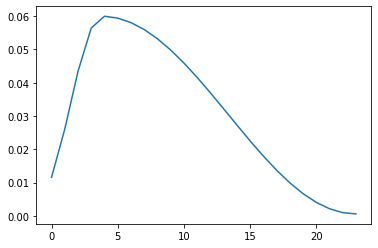

In [0]:
plt.plot(statsmanager.data["lr"])